# Ratings of Yelp Reviews Prediction
#### Yichen Shi, Yanran Wang, Kai Wang

## Part 1: Background & Data Overview
* <font size='+1.5'>Thesis Statement</font>
   * **Background:**  Yelp is an Internet company founded in 2004 to “help people find great local businesses” by providing a platform for users to write reviews of businesses. 

   * **Goal:**  1. find out what makes a review positive or negative based on the review and a small set of attributes; 2. propose a prediction model to predict the ratings of reviews based on the text and said attributes.

* <font size='+1.5'>Dataset:</font>  In the dataset collected in recent years, stars, name, text, date, city, categories, longitude and latitude were recorded for 1,546,379 reviews:

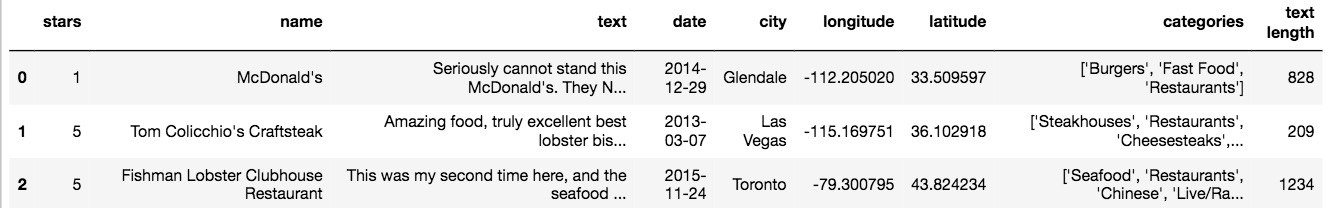

In [3]:
from IPython.display import Image
Image("../Image/head.png")

## Part 2: text Processing & Prediction Model
### 2.1 Text Processing
* Text Processing
    * Remove punctuations
    * Lowercase every word
    * Extract the word stem
    * Remove stopwords
* Generate corpus from the whole train data and vectorize all texts that comprise a large sparse matrix.
* Dimension Reduction
    * Chi-square test that selects K most informative columns
* Convert following features into numpy arrays and merge into the original sparse matrix
    * The number of specific punctuations and expressions: ‘?’, ’!’, ’:)’, ’:D’, etc.
    * The number of all caps: ‘GOOD’,’NOT’,etc.
    * Text length
    
### 2.2 Model Fitting

Then we applied different models to select features and do the prediction. By comparing precision of different models on the test set, we get the table below.

We also tried to combine other variables, like longitude, latitude and categories altogether, but there seems no prove to the accuracy of prediction.

INFO | KNN |Lasso | Ridge| SVM|Random Forest|Neural Network|Logistic|Naive Bayes|
------------ | -------------| ------------- |-------------  | ------| ------| -------------| -------------| -------------| -------------
Just Text| 0.95623       |0.92309   | 0.82218     |0.76966 | 0.86966    | 0.66243 | 0.62696 | 0.90876
Text and Category   | 0.94235 | 0.92242| 0.80475| 0.76656| 0.85546| 0.65644 | 0.62682| 0.90123

As can be seen in the table Logistic regression performs the best. And Text+Category predicts more accurately than just Text.

## Part 3: Features Processing & Interpretable Model
Although we have fitted several models to do the prediction, we cannot explain our model, so we fit another interpretable model, which is much more straightforward.

### 3.1 Feature Processing
We first extracted year, month, day, longitude and latitude and scale them. For texts, we calculated average stars  for each words and then got average score for each review. We do the same thing on categories. Finally, we used these 7 variables to do a simple regression on stars.

### 3.2 Model Fitting
Our model is $$\text{Stars} = 3.741 + 1.108723*\text{TextScore}+ 0.042362*\text{CategoryScore}- 0.001122*\text{longitude}+ 0.001569*\text{latitude}+ 0.000914*\text{Year}+ 0.000569*\text{Month}+ 0.000629*\text{Day} $$
Since only TextScore and CategoryScore are significant, here is our final Interpretable Model:
$$\text{Stars} = 3.741 + 1.108723*\text{TextScore}+ 0.043080*\text{CategoryScore}$$

From the model, we can see that texts and categories are the most important effect in rating.

### 3.3 Positive & Negative
Aparently, texts play an important role in determining whether a review is positive or negative. To discuss the answer of our Goal 1, we plotted word clouds consists of words in texts can mostly indicate a positive or negative review: 

In [4]:
from IPython.display import Image
Image("../Image/WordCloud.png")

TypeError: a bytes-like object is required, not 'str'

TypeError: 'NoneType' object is not iterable

## Part 4: Conclusion
### 4.1 Strengths
   * **Prediction Model:** Our prediction model has been chosen for its greatest strength, which is high accuracy and small RMSE, about 0.62 given by Kaggle.
   * **Interpretable Model:** Compared to other complex model, this model is more intuitive and easy to interpret.
   
### 4.2 Weaknesses
   * **Prediction Model:** We've tried much more advanved methods such as Neural Network, however failed to get the final results due to time and device limit. Also, there're more useful ways we could've tried to improve our text processing to get more effective clean data.
   * **Interpretable Model:** This model has poor accuracy since it is supposed to be simple.
   
### 4.3 Contribution

| Name         | Contibution                                                                     |
|--------------|---------------------------------------------------------------------------------|
| Yichen Shi   | Analyzed data and fitted two models.                                            |
| Yanran Wang  | Analyzed data, made GitHub repo, notebook, and slides for presentation.         |
| Kai Wang     | Analyzed and explored features. Processed data.                                 |